In [1]:
!pip install mlflow pycaret


In [2]:
from mlflow import *
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import pycaret
pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.options.display.max_colwidth=None

In [3]:
df=pd.read_excel("./Dataset/House_Rent_Train.xlsx")
df.head()

id  type       locality      activation_date  \
0  ff8081815733a243015733b2876600a6  BHK2            NaN     21-04-2018 14:44   
1  ff8081815ee25e15015ee50004da2acd  BHK2      Bellandur  2017-09-10 12:48:00   
2  ff80818163f29c9e0163f46770b873e7  BHK3  Thiruvanmiyur  2018-12-06 22:02:00   
3  ff80818164b68a700164b74b1b247a1d  BHK1      Attiguppe     20-07-2018 16:22   
4  ff80818163b1faf00163b4b9b8a163b1  BHK3      Kodihalli     31-05-2018 17:41   

    latitude  longitude lease_type  gym  lift  swimming_pool  negotiable  \
0  12.934471  77.634471     FAMILY    1     1              1           0   
1  12.929557  77.672280     ANYONE    0     1              0           1   
2  12.982870  80.262012     FAMILY    0     1              0           0   
3  12.955991  77.531634     FAMILY    0     0              0           1   
4  12.963903  77.649446     FAMILY    0     0              0           1   

       furnishing      parking  property_size  property_age  bathroom facing  \
0  SEMI_FURNISHED         BOTH           1250          25.0       2.0      E   
1  SEMI_FURNISHED         BOTH           1400           4.0       2.0     NE   
2  SEMI_FURNISHED         BOTH           1350           6.0       3.0      E   
3  SEMI_FURNISHED  TWO_WHEELER            600           3.0       1.0      E   
4  SEMI_FURNISHED         BOTH           1500          15.0       3.0      E   

   cup_board  floor  total_floor  \
0        2.0    6.0         12.0   
1        2.0    3.0          4.0   
2        3.0    1.0          5.0   
3        1.0    1.0          2.0   
4        4.0    0.0          0.0   

                                                                                                                                                                                                                                               amenities  \
0                 {"LIFT":true,"GYM":true,"INTERNET":true,"AC":false,"CLUB":true,"INTERCOM":true,"POOL":true,"CPA":true,"FS":true,"SERVANT":false,"SECURITY":true,"SC":true,"GP":true,"PARK":false,"RWH":true,"STP":true,"HK":false,"PB":true,"VP":true}   
1          {"LIFT":true,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":false,"FS":false,"SERVANT":false,"SECURITY":true,"SC":true,"GP":false,"PARK":true,"RWH":true,"STP":true,"HK":false,"PB":true,"VP":true}   
2        {"LIFT":true,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":true,"FS":false,"SERVANT":false,"SECURITY":false,"SC":true,"GP":false,"PARK":true,"RWH":false,"STP":false,"HK":false,"PB":true,"VP":true}   
3  {"LIFT":false,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":false,"FS":false,"SERVANT":false,"SECURITY":false,"SC":false,"GP":false,"PARK":false,"RWH":false,"STP":false,"HK":false,"PB":false,"VP":false}   
4     {"LIFT":false,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":true,"FS":false,"SERVANT":false,"SECURITY":false,"SC":false,"GP":false,"PARK":true,"RWH":false,"STP":false,"HK":false,"PB":false,"VP":true}   

  water_supply building_type  balconies     rent  
0    CORP_BORE            AP        2.0  40000.0  
1  CORPORATION            AP        2.0  22000.0  
2    CORP_BORE            AP        3.0  28000.0  
3  CORPORATION            IH        0.0   8000.0  
4  CORPORATION            IH        1.0  45000.0

In [4]:
df.shape

(20555, 25)

In [5]:
for i in range(1,24):
    df.drop(df[df['id'] == i].index, inplace=True)

In [6]:
df.isnull().sum()

id                   0
type                18
locality           137
activation_date      0
latitude             0
longitude            0
lease_type           0
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age         0
bathroom             0
facing               0
cup_board            0
floor                0
total_floor          0
amenities            0
water_supply         0
building_type        0
balconies            0
rent                 0
dtype: int64

In [7]:
amenities=df['amenities']
amenities

0                       {"LIFT":true,"GYM":true,"INTERNET":true,"AC":false,"CLUB":true,"INTERCOM":true,"POOL":true,"CPA":true,"FS":true,"SERVANT":false,"SECURITY":true,"SC":true,"GP":true,"PARK":false,"RWH":true,"STP":true,"HK":false,"PB":true,"VP":true}
1                {"LIFT":true,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":false,"FS":false,"SERVANT":false,"SECURITY":true,"SC":true,"GP":false,"PARK":true,"RWH":true,"STP":true,"HK":false,"PB":true,"VP":true}
2              {"LIFT":true,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":true,"FS":false,"SERVANT":false,"SECURITY":false,"SC":true,"GP":false,"PARK":true,"RWH":false,"STP":false,"HK":false,"PB":true,"VP":true}
3        {"LIFT":false,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":false,"FS":false,"SERVANT":false,"SECURITY":false,"SC":false,"GP":false,"PARK":false,"RWH":false,"STP":false,"HK":false,"PB

In [8]:
amenities_value=[]
for i in range(len(df['amenities'])):
    amenities_value.append(df['amenities'][i])

In [9]:
import json
amenities_dicts=[json.loads(value) for value in amenities_value]
dff=pd.DataFrame(amenities_dicts)


In [10]:
for i in dff.columns:
    df[i]=dff[i]

In [11]:
duplicate_column=['gym','lift','swimming_pool']
for column in duplicate_column:
    print(df[column].value_counts())

0    15874
1     4658
Name: gym, dtype: int64
0    13104
1     7428
Name: lift, dtype: int64
0    16942
1     3590
Name: swimming_pool, dtype: int64


In [12]:
df.drop(['amenities','id'],axis=1,inplace=True)
df.head()

type       locality      activation_date   latitude  longitude lease_type  \
0  BHK2            NaN     21-04-2018 14:44  12.934471  77.634471     FAMILY   
1  BHK2      Bellandur  2017-09-10 12:48:00  12.929557  77.672280     ANYONE   
2  BHK3  Thiruvanmiyur  2018-12-06 22:02:00  12.982870  80.262012     FAMILY   
3  BHK1      Attiguppe     20-07-2018 16:22  12.955991  77.531634     FAMILY   
4  BHK3      Kodihalli     31-05-2018 17:41  12.963903  77.649446     FAMILY   

   gym  lift  swimming_pool  negotiable      furnishing      parking  \
0    1     1              1           0  SEMI_FURNISHED         BOTH   
1    0     1              0           1  SEMI_FURNISHED         BOTH   
2    0     1              0           0  SEMI_FURNISHED         BOTH   
3    0     0              0           1  SEMI_FURNISHED  TWO_WHEELER   
4    0     0              0           1  SEMI_FURNISHED         BOTH   

   property_size  property_age  bathroom facing  cup_board  floor  \
0           1250          25.0       2.0      E        2.0    6.0   
1           1400           4.0       2.0     NE        2.0    3.0   
2           1350           6.0       3.0      E        3.0    1.0   
3            600           3.0       1.0      E        1.0    1.0   
4           1500          15.0       3.0      E        4.0    0.0   

   total_floor water_supply building_type  balconies     rent   LIFT    GYM  \
0         12.0    CORP_BORE            AP        2.0  40000.0   True   True   
1          4.0  CORPORATION            AP        2.0  22000.0   True  False   
2          5.0    CORP_BORE            AP        3.0  28000.0   True  False   
3          2.0  CORPORATION            IH        0.0   8000.0  False  False   
4          0.0  CORPORATION            IH        1.0  45000.0  False  False   

   INTERNET     AC   CLUB  INTERCOM   POOL    CPA     FS SERVANT  SECURITY  \
0      True  False   True      True   True   True   True   False      True   
1     False  False  False     False  False  False  False   False      True   
2     False  False  False     False  False   True  False   False     False   
3     False  False  False     False  False  False  False   False     False   
4     False  False  False     False  False   True  False   False     False   

      SC     GP   PARK    RWH    STP     HK     PB     VP  
0   True   True  False   True   True  False   True   True  
1   True  False   True   True   True  False   True   True  
2   True  False   True  False  False  False   True   True  
3  False  False  False  False  False  False  False  False  
4  False  False   True  False  False  False  False   True

In [13]:
df.drop(['locality','gym','lift','swimming_pool'],axis=1,inplace=True)

In [14]:
df.isna().sum()

type                 18
activation_date       0
latitude              0
longitude             0
lease_type            0
negotiable            0
furnishing            0
parking               0
property_size         0
property_age          0
bathroom              0
facing                0
cup_board             0
floor                 0
total_floor           0
water_supply          0
building_type         0
balconies             0
rent                  0
LIFT                  0
GYM                  62
INTERNET              0
AC                    0
CLUB               1067
INTERCOM              0
POOL                  0
CPA                1067
FS                    0
SERVANT            1067
SECURITY              0
SC                    0
GP                 1067
PARK                  0
RWH                1067
STP                1067
HK                    0
PB                    0
VP                 1067
dtype: int64

In [15]:
column=dff.columns
df[column]=df[column].fillna(False)

In [16]:
replace_value={'bhk2':'BHK2','bhk3': 'BHK3','1BHK1':'BHK1'}
df['type']=df['type'].replace(replace_value)

In [17]:
df=df.dropna(axis=0)


In [18]:
df.isna().sum()

type               0
activation_date    0
latitude           0
longitude          0
lease_type         0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
water_supply       0
building_type      0
balconies          0
rent               0
LIFT               0
GYM                0
INTERNET           0
AC                 0
CLUB               0
INTERCOM           0
POOL               0
CPA                0
FS                 0
SERVANT            0
SECURITY           0
SC                 0
GP                 0
PARK               0
RWH                0
STP                0
HK                 0
PB                 0
VP                 0
dtype: int64

In [19]:
df.head()

type      activation_date   latitude  longitude lease_type  negotiable  \
0  BHK2     21-04-2018 14:44  12.934471  77.634471     FAMILY           0   
1  BHK2  2017-09-10 12:48:00  12.929557  77.672280     ANYONE           1   
2  BHK3  2018-12-06 22:02:00  12.982870  80.262012     FAMILY           0   
3  BHK1     20-07-2018 16:22  12.955991  77.531634     FAMILY           1   
4  BHK3     31-05-2018 17:41  12.963903  77.649446     FAMILY           1   

       furnishing      parking  property_size  property_age  bathroom facing  \
0  SEMI_FURNISHED         BOTH           1250          25.0       2.0      E   
1  SEMI_FURNISHED         BOTH           1400           4.0       2.0     NE   
2  SEMI_FURNISHED         BOTH           1350           6.0       3.0      E   
3  SEMI_FURNISHED  TWO_WHEELER            600           3.0       1.0      E   
4  SEMI_FURNISHED         BOTH           1500          15.0       3.0      E   

   cup_board  floor  total_floor water_supply building_type  balconies  \
0        2.0    6.0         12.0    CORP_BORE            AP        2.0   
1        2.0    3.0          4.0  CORPORATION            AP        2.0   
2        3.0    1.0          5.0    CORP_BORE            AP        3.0   
3        1.0    1.0          2.0  CORPORATION            IH        0.0   
4        4.0    0.0          0.0  CORPORATION            IH        1.0   

      rent   LIFT    GYM  INTERNET     AC   CLUB  INTERCOM   POOL    CPA  \
0  40000.0   True   True      True  False   True      True   True   True   
1  22000.0   True  False     False  False  False     False  False  False   
2  28000.0   True  False     False  False  False     False  False   True   
3   8000.0  False  False     False  False  False     False  False  False   
4  45000.0  False  False     False  False  False     False  False   True   

      FS  SERVANT  SECURITY     SC     GP   PARK    RWH    STP     HK     PB  \
0   True    False      True   True   True  False   True   True  False   True   
1  False    False      True   True  False   True   True   True  False   True   
2  False    False     False   True  False   True  False  False  False   True   
3  False    False     False  False  False  False  False  False  False  False   
4  False    False     False  False  False   True  False  False  False  False   

      VP  
0   True  
1   True  
2   True  
3  False  
4   True

# Check the Categorical Unique Values

In [20]:
df['lease_type'].unique()

array(['FAMILY', 'ANYONE', 'BACHELOR', 'COMPANY'], dtype=object)

In [21]:
df['furnishing'].unique()

array(['SEMI_FURNISHED', 'FULLY_FURNISHED', 'NOT_FURNISHED'], dtype=object)

In [22]:
df['parking'].unique()

array(['BOTH', 'TWO_WHEELER', 'NONE', 'FOUR_WHEELER'], dtype=object)

In [23]:
df['facing'].unique()

array(['E', 'NE', 'S', 'N', 'SE', 'W', 'NW', 'SW'], dtype=object)

In [24]:
df['water_supply'].unique()

array(['CORP_BORE', 'CORPORATION', 'BOREWELL'], dtype=object)

In [25]:
df['building_type'].unique()

array(['AP', 'IH', 'IF', 'GC'], dtype=object)

In [26]:
#locality

In [27]:
df.columns

Index(['type', 'activation_date', 'latitude', 'longitude', 'lease_type',
       'negotiable', 'furnishing', 'parking', 'property_size', 'property_age',
       'bathroom', 'facing', 'cup_board', 'floor', 'total_floor',
       'water_supply', 'building_type', 'balconies', 'rent', 'LIFT', 'GYM',
       'INTERNET', 'AC', 'CLUB', 'INTERCOM', 'POOL', 'CPA', 'FS', 'SERVANT',
       'SECURITY', 'SC', 'GP', 'PARK', 'RWH', 'STP', 'HK', 'PB', 'VP'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20514 entries, 0 to 20531
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             20514 non-null  object 
 1   activation_date  20514 non-null  object 
 2   latitude         20514 non-null  float64
 3   longitude        20514 non-null  float64
 4   lease_type       20514 non-null  object 
 5   negotiable       20514 non-null  int64  
 6   furnishing       20514 non-null  object 
 7   parking          20514 non-null  object 
 8   property_size    20514 non-null  int64  
 9   property_age     20514 non-null  float64
 10  bathroom         20514 non-null  float64
 11  facing           20514 non-null  object 
 12  cup_board        20514 non-null  float64
 13  floor            20514 non-null  float64
 14  total_floor      20514 non-null  float64
 15  water_supply     20514 non-null  object 
 16  building_type    20514 non-null  object 
 17  balconies   

In [29]:
df['rent'] = df['rent'].astype(int)

In [30]:
df['activation_date']=pd.to_datetime(df['activation_date'])


In [31]:
activation_date = df['activation_date'].dt.strftime('%Y-%m-%d')
df['activation_date']=activation_date


In [32]:
df['activation_date']= pd.to_datetime(df['activation_date'])

In [33]:
df.head()

type activation_date   latitude  longitude lease_type  negotiable  \
0  BHK2      2018-04-21  12.934471  77.634471     FAMILY           0   
1  BHK2      2017-09-10  12.929557  77.672280     ANYONE           1   
2  BHK3      2018-12-06  12.982870  80.262012     FAMILY           0   
3  BHK1      2018-07-20  12.955991  77.531634     FAMILY           1   
4  BHK3      2018-05-31  12.963903  77.649446     FAMILY           1   

       furnishing      parking  property_size  property_age  bathroom facing  \
0  SEMI_FURNISHED         BOTH           1250          25.0       2.0      E   
1  SEMI_FURNISHED         BOTH           1400           4.0       2.0     NE   
2  SEMI_FURNISHED         BOTH           1350           6.0       3.0      E   
3  SEMI_FURNISHED  TWO_WHEELER            600           3.0       1.0      E   
4  SEMI_FURNISHED         BOTH           1500          15.0       3.0      E   

   cup_board  floor  total_floor water_supply building_type  balconies   rent  \
0        2.0    6.0         12.0    CORP_BORE            AP        2.0  40000   
1        2.0    3.0          4.0  CORPORATION            AP        2.0  22000   
2        3.0    1.0          5.0    CORP_BORE            AP        3.0  28000   
3        1.0    1.0          2.0  CORPORATION            IH        0.0   8000   
4        4.0    0.0          0.0  CORPORATION            IH        1.0  45000   

    LIFT    GYM  INTERNET     AC   CLUB  INTERCOM   POOL    CPA     FS  \
0   True   True      True  False   True      True   True   True   True   
1   True  False     False  False  False     False  False  False  False   
2   True  False     False  False  False     False  False   True  False   
3  False  False     False  False  False     False  False  False  False   
4  False  False     False  False  False     False  False   True  False   

   SERVANT  SECURITY     SC     GP   PARK    RWH    STP     HK     PB     VP  
0    False      True   True   True  False   True   True  False   True   True  
1    False      True   True  False   True   True   True  False   True   True  
2    False     False   True  False   True  False  False  False   True   True  
3    False     False  False  False  False  False  False  False  False  False  
4    False     False  False  False   True  False  False  False  False   True

# EDA

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20514 entries, 0 to 20531
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   type             20514 non-null  object        
 1   activation_date  20514 non-null  datetime64[ns]
 2   latitude         20514 non-null  float64       
 3   longitude        20514 non-null  float64       
 4   lease_type       20514 non-null  object        
 5   negotiable       20514 non-null  int64         
 6   furnishing       20514 non-null  object        
 7   parking          20514 non-null  object        
 8   property_size    20514 non-null  int64         
 9   property_age     20514 non-null  float64       
 10  bathroom         20514 non-null  float64       
 11  facing           20514 non-null  object        
 12  cup_board        20514 non-null  float64       
 13  floor            20514 non-null  float64       
 14  total_floor      20514 non-null  float

In [35]:
df.describe(include=['object'])

type lease_type      furnishing parking facing water_supply  \
count   20514      20514           20514   20514  20514        20514   
unique      6          4               3       4      8            3   
top      BHK2     FAMILY  SEMI_FURNISHED    BOTH      E    CORP_BORE   
freq    11687      10184           17909   10805   9522        10697   

       building_type  
count          20514  
unique             4  
top               IF  
freq            9240

In [36]:
dff=df.copy()

## Numerical Values 

In [37]:
numerical_variable= df.select_dtypes(include=['int', 'float'])
numerical_column_names = numerical_variable.columns.tolist()
numerical_column_names

['latitude',
 'longitude',
 'negotiable',
 'property_size',
 'property_age',
 'bathroom',
 'cup_board',
 'floor',
 'total_floor',
 'balconies',
 'rent']

## Discreate Values

In [38]:
discreate_variable=[column for column in numerical_column_names if len(df[column].unique())<25]
len(discreate_variable)

5

In [39]:
discreate_variable

['negotiable', 'bathroom', 'cup_board', 'floor', 'balconies']

In [40]:
df[discreate_variable].head()

negotiable  bathroom  cup_board  floor  balconies
0           0       2.0        2.0    6.0        2.0
1           1       2.0        2.0    3.0        2.0
2           0       3.0        3.0    1.0        3.0
3           1       1.0        1.0    1.0        0.0
4           1       3.0        4.0    0.0        1.0

In [73]:
#Outliers Discreate Variable

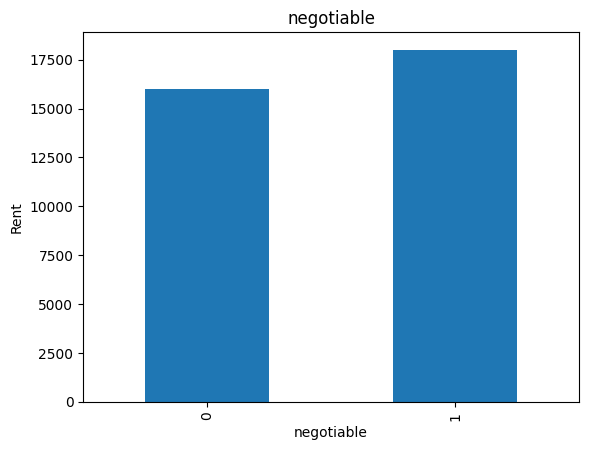

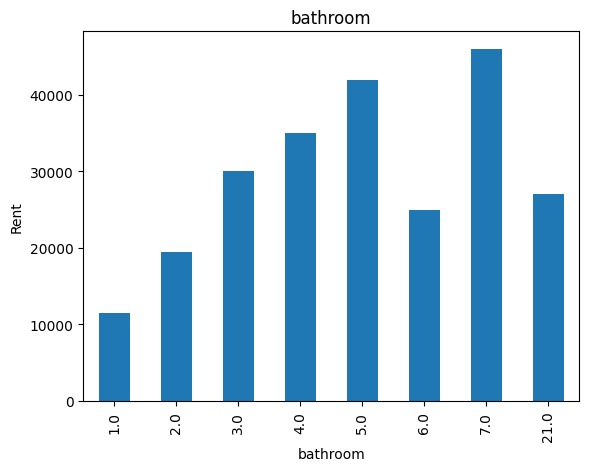

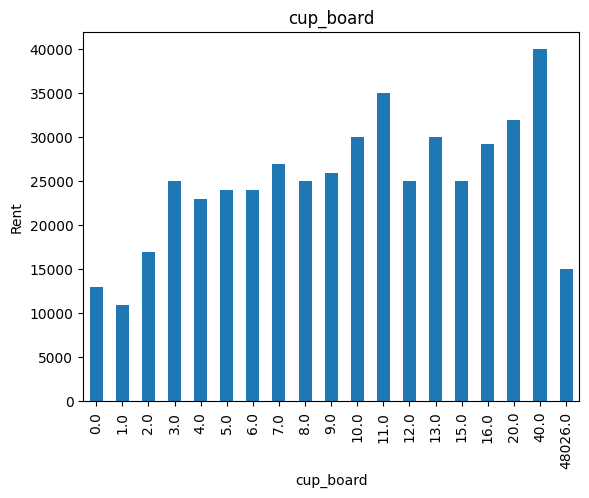

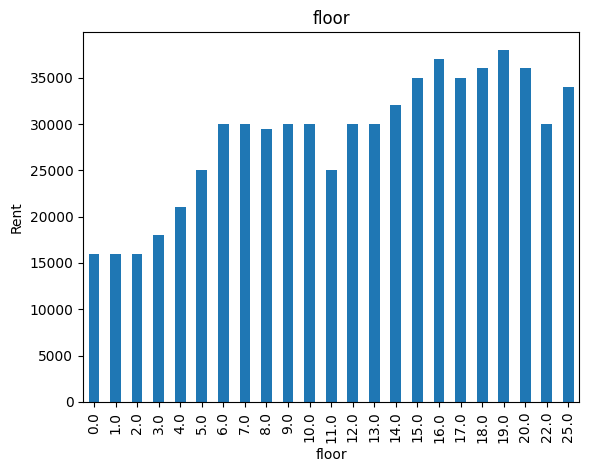

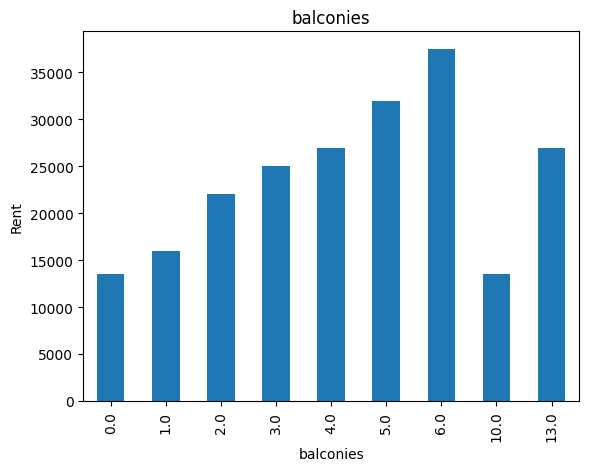

In [41]:
for column in discreate_variable:
    df.groupby(column)['rent'].median().plot.bar()
    plt.xlabel(column)
    plt.ylabel("Rent")
    plt.title(column)
    plt.show()

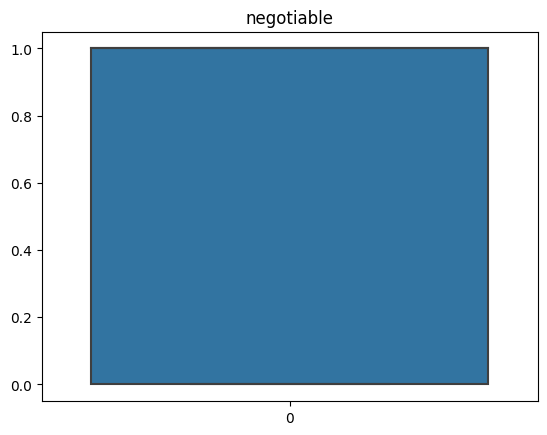

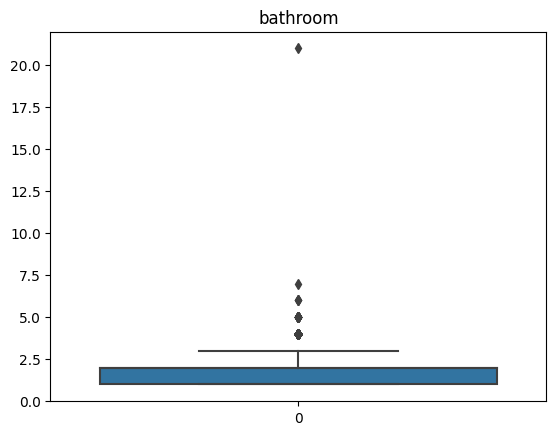

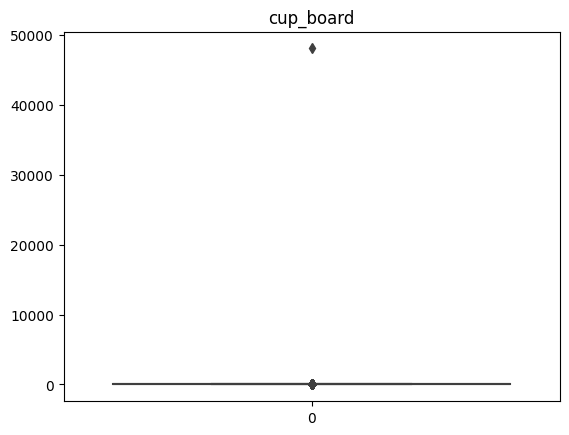

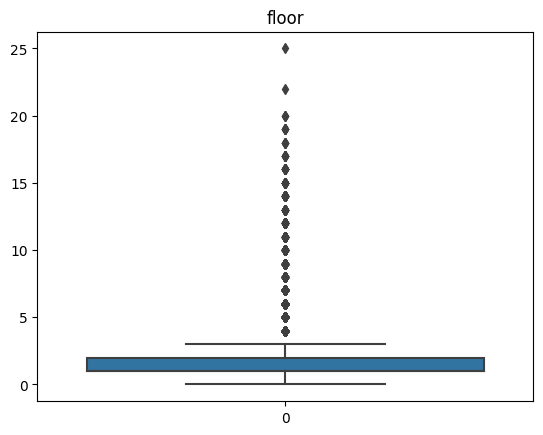

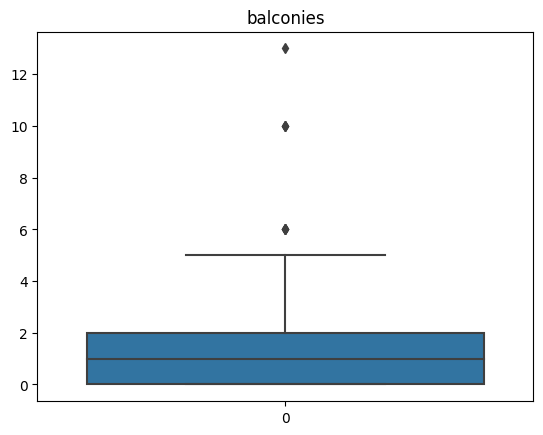

In [42]:
for column in discreate_variable:
    sns.boxplot(df[column])
    plt.title(column)
    plt.show()

In [74]:
#After capping Outliers in Discreate Variable

In [43]:
new_df_discreate=df.copy()
for column in discreate_variable:
    lower_limit=df[column].quantile(0.01)
    upper_limit=df[column].quantile(0.99)
    print(upper_limit,lower_limit)
    df.loc[(df[column]>upper_limit),column]=upper_limit
    df.loc[(df[column]<lower_limit),column]=lower_limit
 
    

1.0 0.0
4.0 1.0
8.0 0.0
11.0 0.0
4.0 0.0


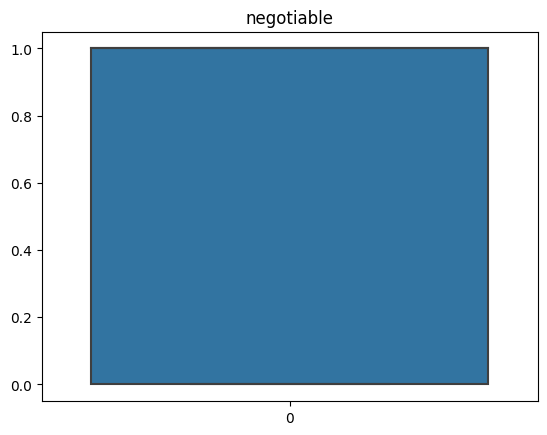

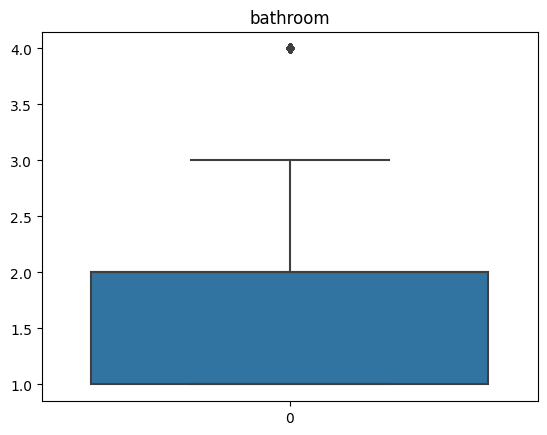

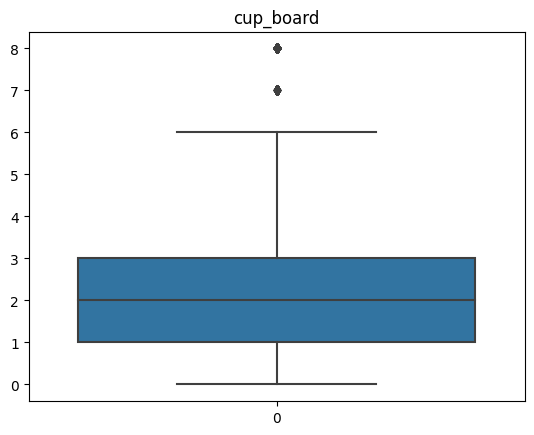

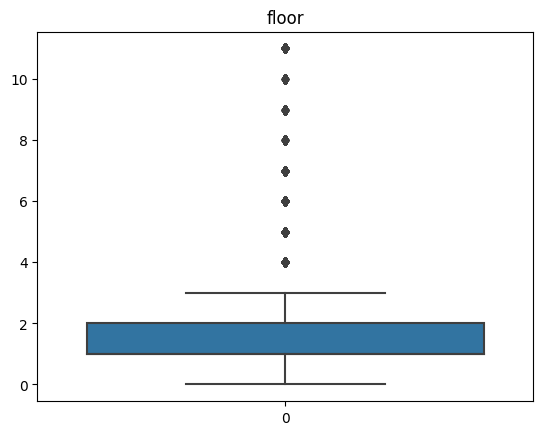

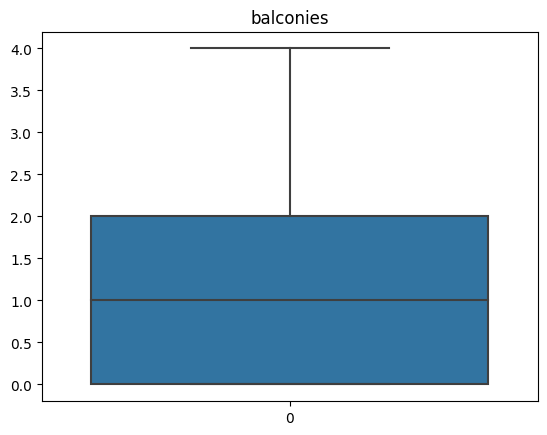

In [44]:
for column in discreate_variable:
    sns.boxplot(df[column])
    plt.title(column)
    plt.show()

## Continous Value

In [45]:
continous_variable=[column for column in numerical_column_names if column not in discreate_variable]
continous_variable

['latitude',
 'longitude',
 'property_size',
 'property_age',
 'total_floor',
 'rent']

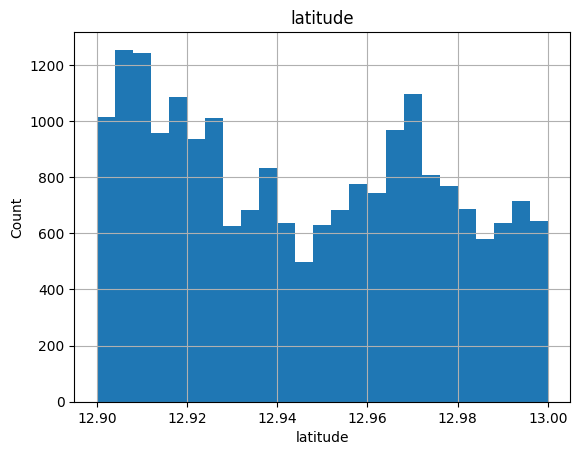

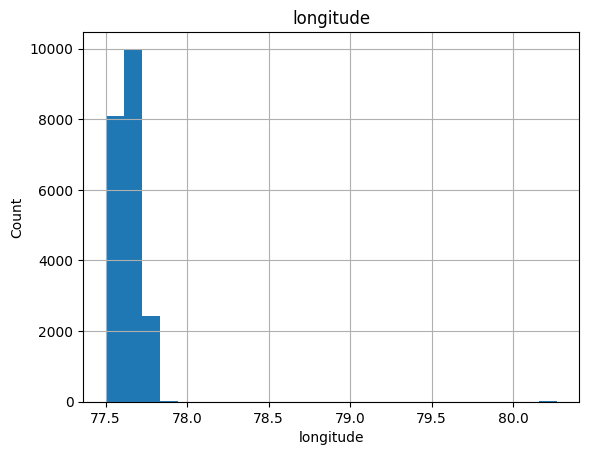

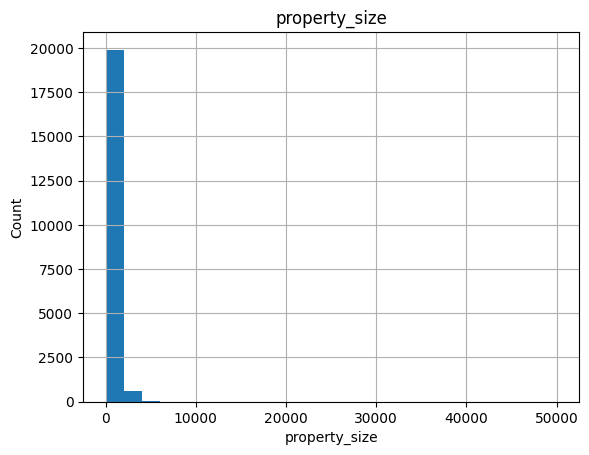

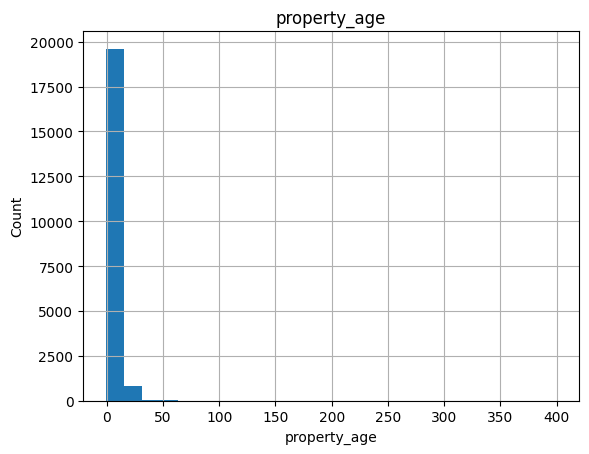

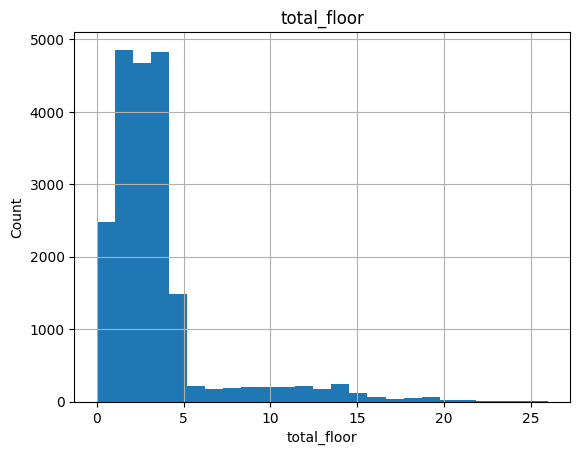

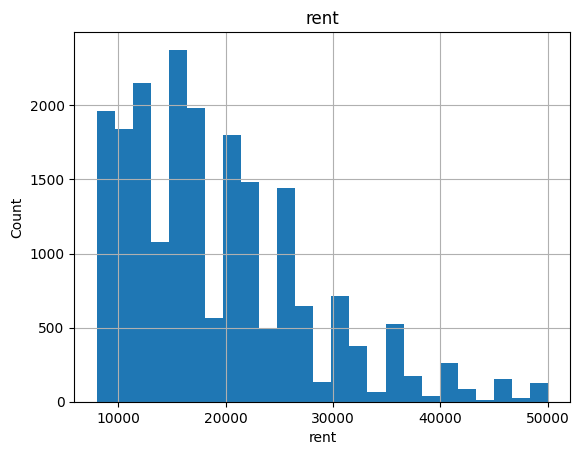

In [46]:
for column in continous_variable:
    data=df.copy()
    data[column].hist(bins=25)
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title(column)
    plt.show()

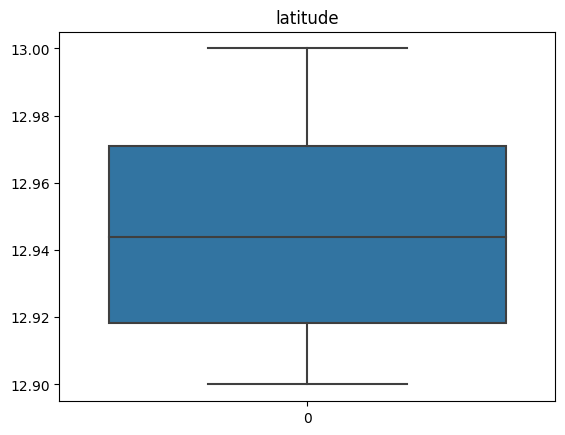

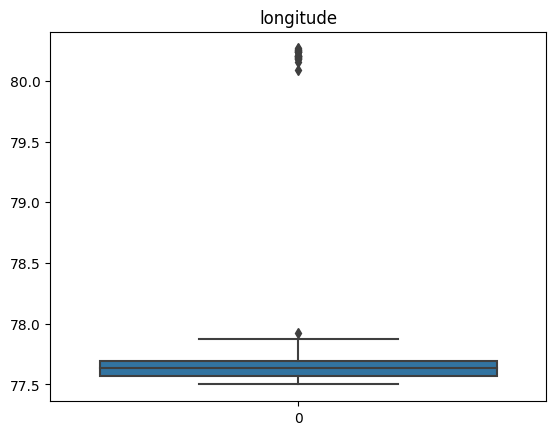

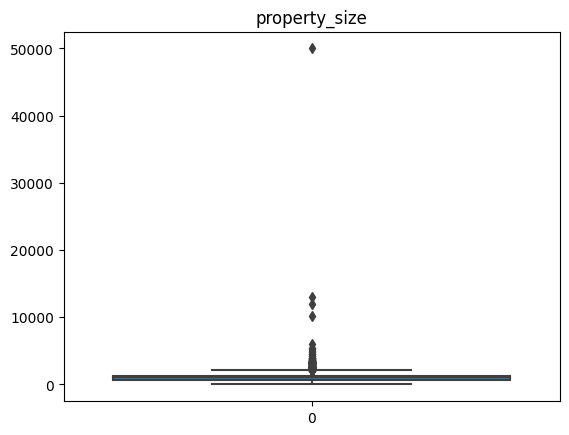

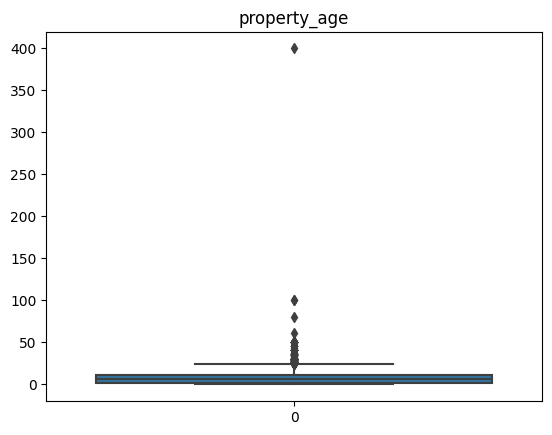

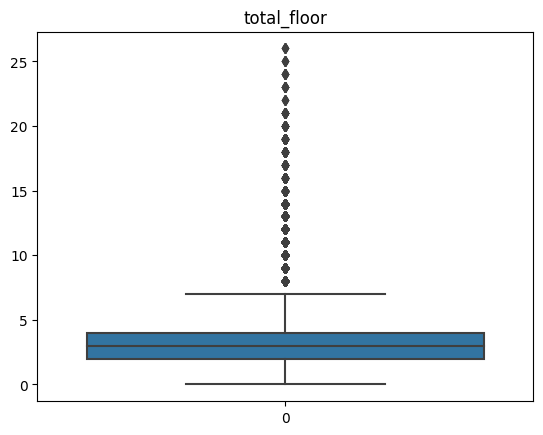

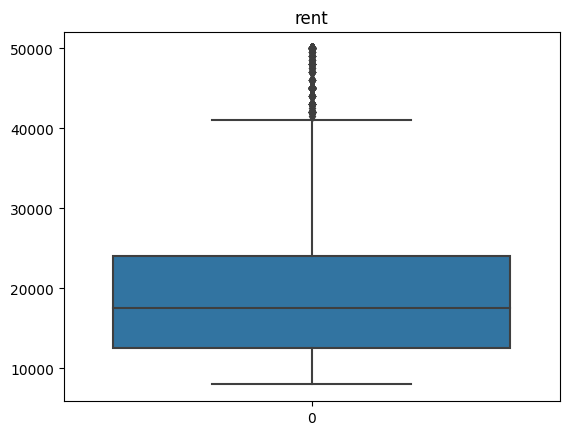

In [47]:
data=df.copy()
for column in continous_variable:
    sns.boxplot(data[column])
    plt.title(column)
    plt.show()

In [48]:
new_df_continous=df.copy()
outlier_column=['longitude','property_size','property_age','total_floor','rent']
for column in outlier_column:
    lower_limit=df[column].quantile(0.01)
    upper_limit=df[column].quantile(0.99)
    print(upper_limit,lower_limit)
    df.loc[(df[column]>upper_limit),column]=upper_limit
    df.loc[(df[column]<lower_limit),column]=lower_limit

    

77.7660778 77.5069326426
2439.869999999999 250.0
25.0 0.0
17.0 0.0
45000.0 8000.0


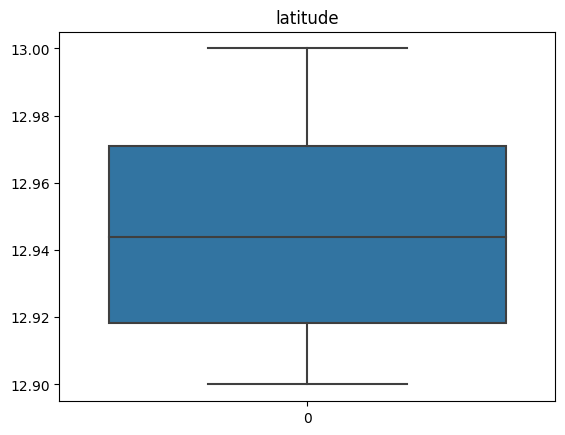

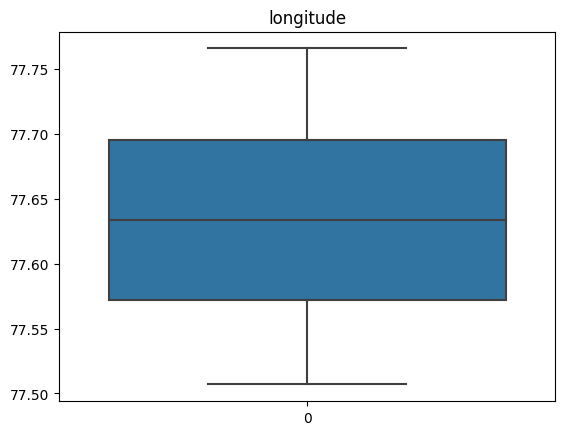

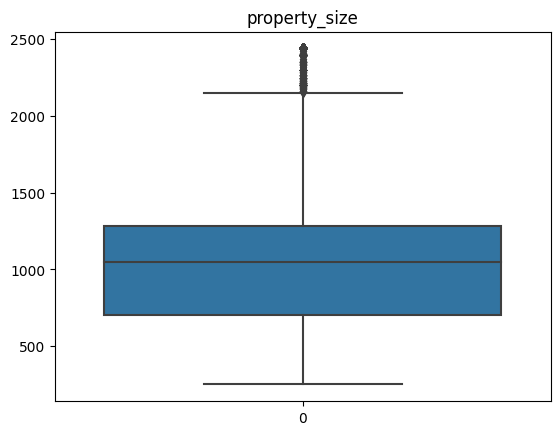

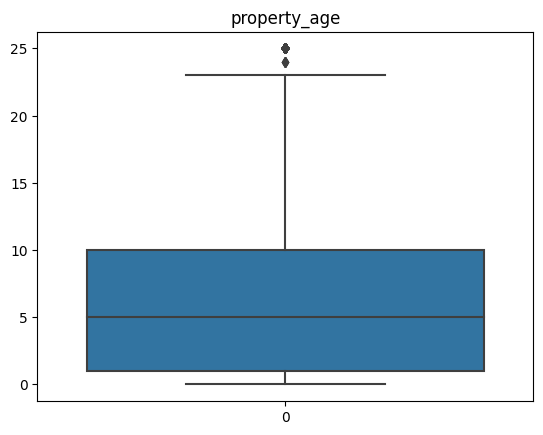

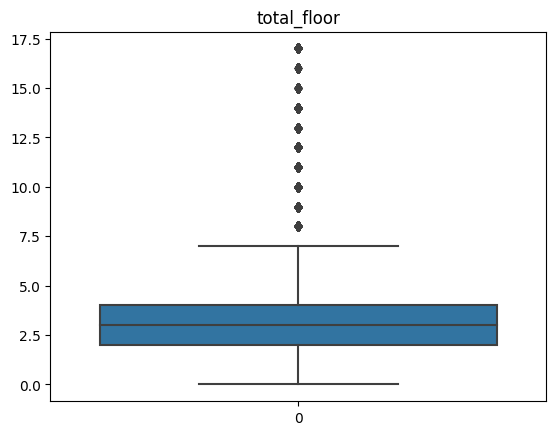

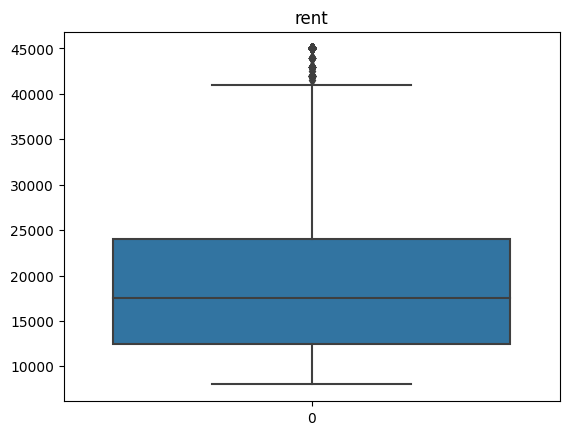

In [49]:
for column in continous_variable:
    sns.boxplot(df[column])
    plt.title(column)
    plt.show()

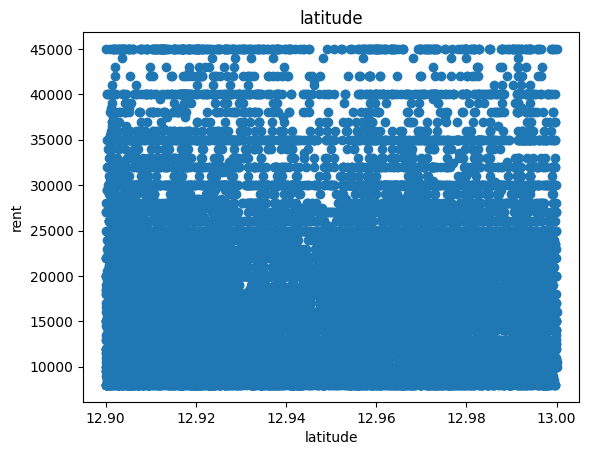

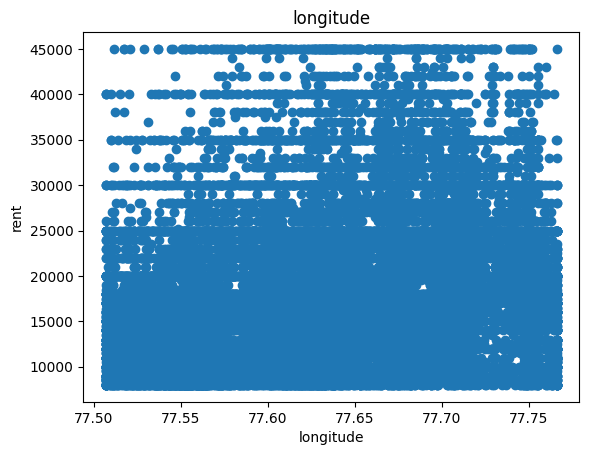

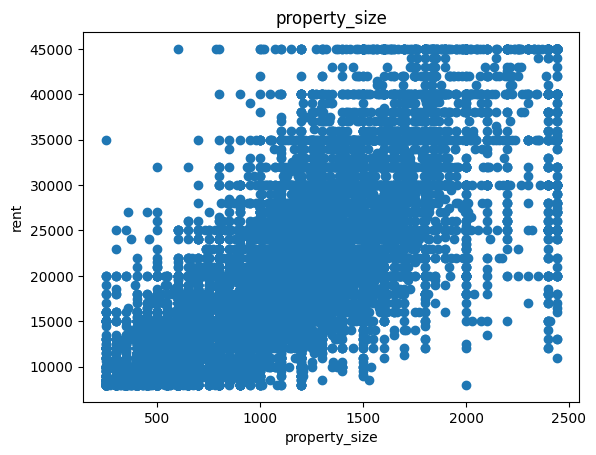

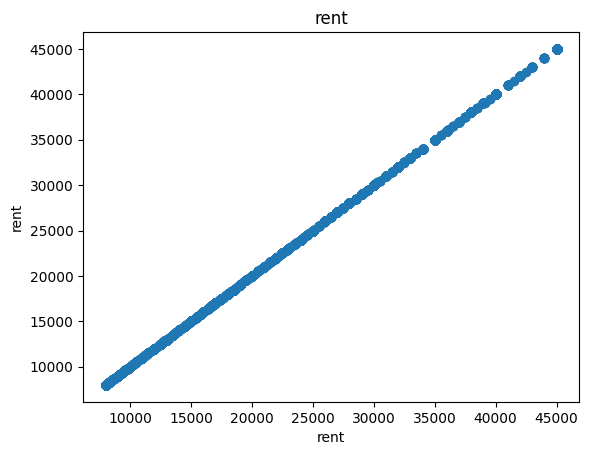

In [50]:
for column in continous_variable:
        data=df.copy()
        if 0 in data[column].unique():
            pass
        else:
            data[column]=data[column]
            data['rent']=data['rent']
            plt.scatter(data[column],data['rent'])
            plt.xlabel(column)
            plt.ylabel('rent')
            plt.title(column)
            plt.show()

## Categorical Value


In [51]:
##categorical variables
categorical_variables=[column for column in df.columns if data[column].dtypes=='O']
len(categorical_variables)

7

In [52]:
df[categorical_variables].head()

type lease_type      furnishing      parking facing water_supply  \
0  BHK2     FAMILY  SEMI_FURNISHED         BOTH      E    CORP_BORE   
1  BHK2     ANYONE  SEMI_FURNISHED         BOTH     NE  CORPORATION   
2  BHK3     FAMILY  SEMI_FURNISHED         BOTH      E    CORP_BORE   
3  BHK1     FAMILY  SEMI_FURNISHED  TWO_WHEELER      E  CORPORATION   
4  BHK3     FAMILY  SEMI_FURNISHED         BOTH      E  CORPORATION   

  building_type  
0            AP  
1            AP  
2            AP  
3            IH  
4            IH

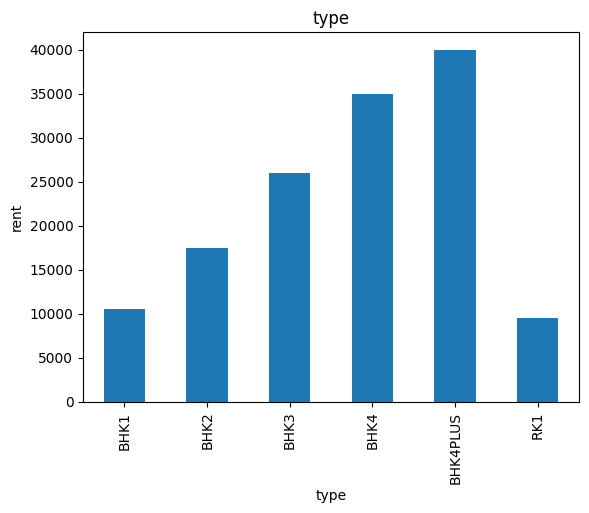

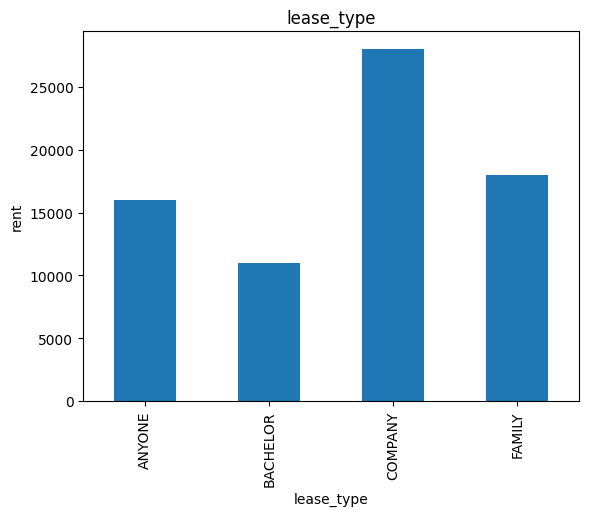

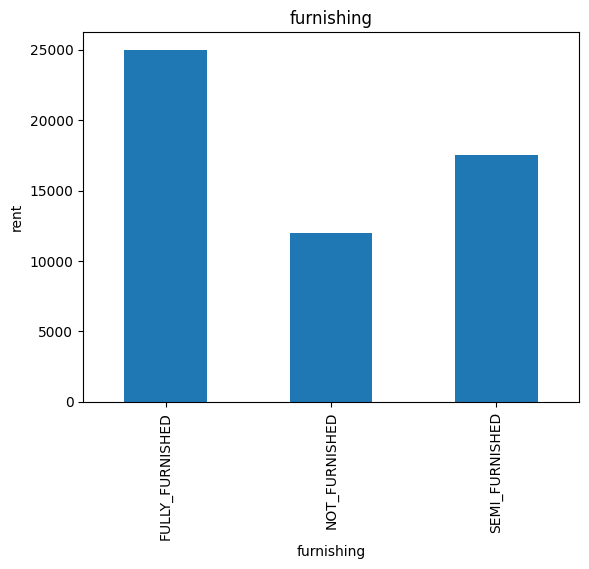

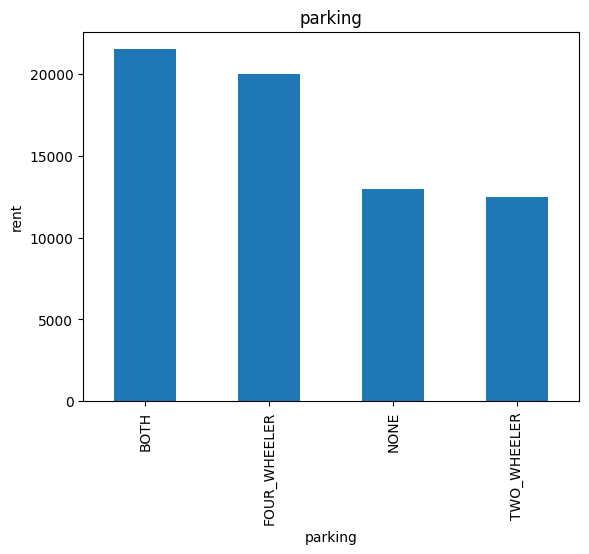

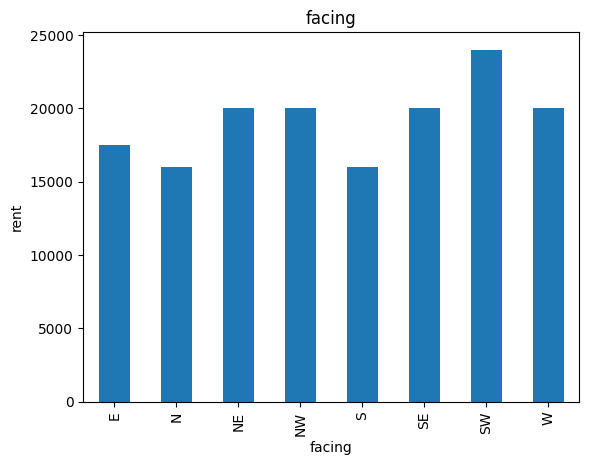

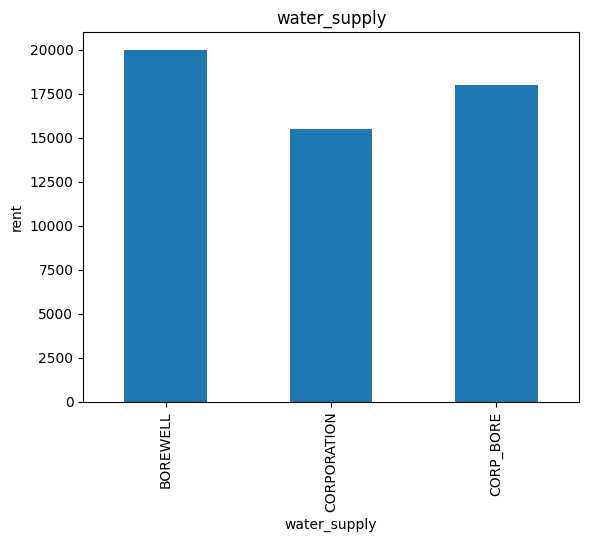

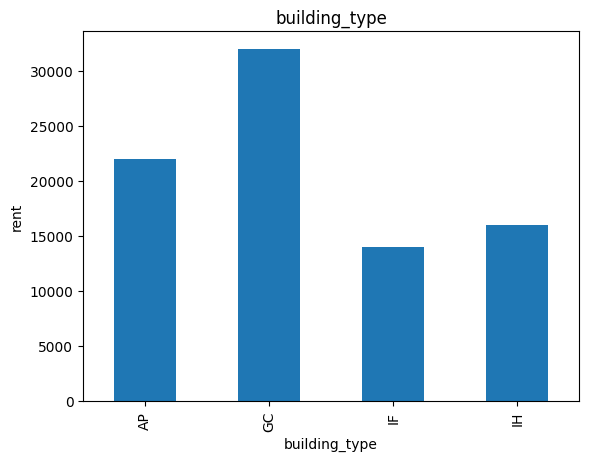

In [53]:
for column in categorical_variables:
    data=df.copy()
    data.groupby(column)['rent'].median().plot.bar()
    plt.xlabel(column)
    plt.ylabel('rent')
    plt.title(column)
    plt.show()

In [54]:
df['activation_date'].head()

0   2018-04-21
1   2017-09-10
2   2018-12-06
3   2018-07-20
4   2018-05-31
Name: activation_date, dtype: datetime64[ns]

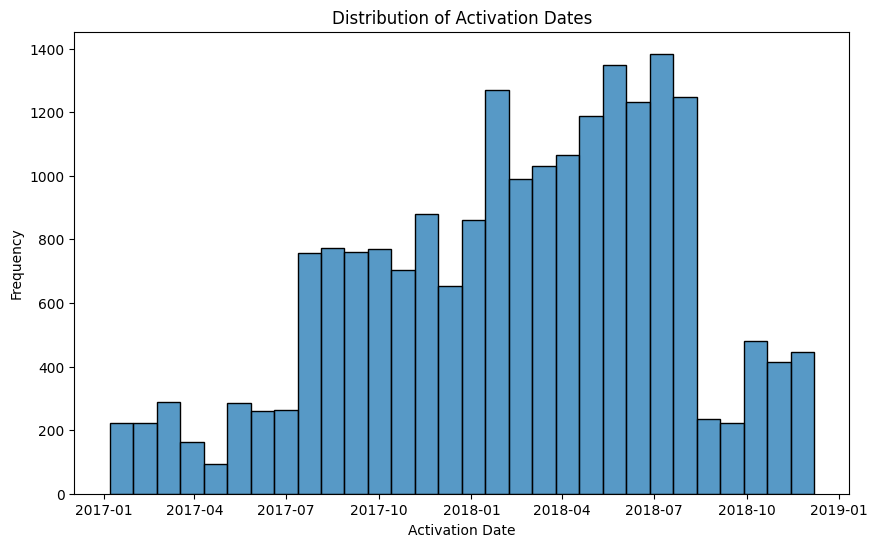

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(df['activation_date'], bins=30)
plt.title('Distribution of Activation Dates')
plt.xlabel('Activation Date')
plt.ylabel('Frequency')
plt.show()


In [56]:
df.head()

type activation_date   latitude  longitude lease_type  negotiable  \
0  BHK2      2018-04-21  12.934471  77.634471     FAMILY           0   
1  BHK2      2017-09-10  12.929557  77.672280     ANYONE           1   
2  BHK3      2018-12-06  12.982870  77.766078     FAMILY           0   
3  BHK1      2018-07-20  12.955991  77.531634     FAMILY           1   
4  BHK3      2018-05-31  12.963903  77.649446     FAMILY           1   

       furnishing      parking  property_size  property_age  bathroom facing  \
0  SEMI_FURNISHED         BOTH         1250.0          25.0       2.0      E   
1  SEMI_FURNISHED         BOTH         1400.0           4.0       2.0     NE   
2  SEMI_FURNISHED         BOTH         1350.0           6.0       3.0      E   
3  SEMI_FURNISHED  TWO_WHEELER          600.0           3.0       1.0      E   
4  SEMI_FURNISHED         BOTH         1500.0          15.0       3.0      E   

   cup_board  floor  total_floor water_supply building_type  balconies   rent  \
0        2.0    6.0         12.0    CORP_BORE            AP        2.0  40000   
1        2.0    3.0          4.0  CORPORATION            AP        2.0  22000   
2        3.0    1.0          5.0    CORP_BORE            AP        3.0  28000   
3        1.0    1.0          2.0  CORPORATION            IH        0.0   8000   
4        4.0    0.0          0.0  CORPORATION            IH        1.0  45000   

    LIFT    GYM  INTERNET     AC   CLUB  INTERCOM   POOL    CPA     FS  \
0   True   True      True  False   True      True   True   True   True   
1   True  False     False  False  False     False  False  False  False   
2   True  False     False  False  False     False  False   True  False   
3  False  False     False  False  False     False  False  False  False   
4  False  False     False  False  False     False  False   True  False   

   SERVANT  SECURITY     SC     GP   PARK    RWH    STP     HK     PB     VP  
0    False      True   True   True  False   True   True  False   True   True  
1    False      True   True  False   True   True   True  False   True   True  
2    False     False   True  False   True  False  False  False   True   True  
3    False     False  False  False  False  False  False  False  False  False  
4    False     False  False  False   True  False  False  False  False   True

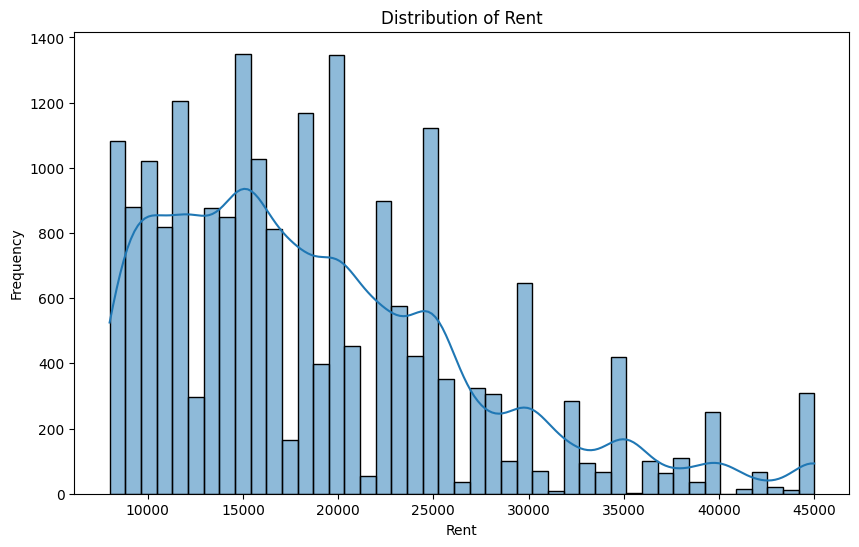

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rent'], kde=True)
plt.title('Distribution of Rent')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.show()

In [58]:
df.describe()

latitude     longitude    negotiable  property_size  property_age  \
count  20514.000000  20514.000000  20514.000000   20514.000000  20514.000000   
mean      12.945753     77.634544      0.711612    1053.423819      5.677001   
std        0.029598      0.071221      0.453024     441.687907      5.303060   
min       12.900004     77.506933      0.000000     250.000000      0.000000   
25%       12.918185     77.572032      0.000000     700.000000      1.000000   
50%       12.943807     77.633484      1.000000    1045.500000      5.000000   
75%       12.970956     77.695702      1.000000    1280.000000     10.000000   
max       12.999999     77.766078      1.000000    2439.870000     25.000000   

           bathroom     cup_board         floor   total_floor     balconies  \
count  20514.000000  20514.000000  20514.000000  20514.000000  20514.000000   
mean       1.854880      2.190455      1.843375      3.774739      1.145364   
std        0.689955      1.426311      2.020320      3.056131      0.976807   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      1.000000      1.000000      2.000000      0.000000   
50%        2.000000      2.000000      1.000000      3.000000      1.000000   
75%        2.000000      3.000000      2.000000      4.000000      2.000000   
max        4.000000      8.000000     11.000000     17.000000      4.000000   

               rent  
count  20514.000000  
mean   19016.059520  
std     8316.917698  
min     8000.000000  
25%    12500.000000  
50%    17500.000000  
75%    24000.000000  
max    45000.000000

In [59]:
df.head()

type activation_date   latitude  longitude lease_type  negotiable  \
0  BHK2      2018-04-21  12.934471  77.634471     FAMILY           0   
1  BHK2      2017-09-10  12.929557  77.672280     ANYONE           1   
2  BHK3      2018-12-06  12.982870  77.766078     FAMILY           0   
3  BHK1      2018-07-20  12.955991  77.531634     FAMILY           1   
4  BHK3      2018-05-31  12.963903  77.649446     FAMILY           1   

       furnishing      parking  property_size  property_age  bathroom facing  \
0  SEMI_FURNISHED         BOTH         1250.0          25.0       2.0      E   
1  SEMI_FURNISHED         BOTH         1400.0           4.0       2.0     NE   
2  SEMI_FURNISHED         BOTH         1350.0           6.0       3.0      E   
3  SEMI_FURNISHED  TWO_WHEELER          600.0           3.0       1.0      E   
4  SEMI_FURNISHED         BOTH         1500.0          15.0       3.0      E   

   cup_board  floor  total_floor water_supply building_type  balconies   rent  \
0        2.0    6.0         12.0    CORP_BORE            AP        2.0  40000   
1        2.0    3.0          4.0  CORPORATION            AP        2.0  22000   
2        3.0    1.0          5.0    CORP_BORE            AP        3.0  28000   
3        1.0    1.0          2.0  CORPORATION            IH        0.0   8000   
4        4.0    0.0          0.0  CORPORATION            IH        1.0  45000   

    LIFT    GYM  INTERNET     AC   CLUB  INTERCOM   POOL    CPA     FS  \
0   True   True      True  False   True      True   True   True   True   
1   True  False     False  False  False     False  False  False  False   
2   True  False     False  False  False     False  False   True  False   
3  False  False     False  False  False     False  False  False  False   
4  False  False     False  False  False     False  False   True  False   

   SERVANT  SECURITY     SC     GP   PARK    RWH    STP     HK     PB     VP  
0    False      True   True   True  False   True   True  False   True   True  
1    False      True   True  False   True   True   True  False   True   True  
2    False     False   True  False   True  False  False  False   True   True  
3    False     False  False  False  False  False  False  False  False  False  
4    False     False  False  False   True  False  False  False  False   True

# Applying Regression Algorithm Using Pycaret

In [60]:
from pycaret.regression import *

In [61]:
model_view=setup(data=df,target='rent',train_size=0.9,session_id=123)

In [62]:
compare_models()

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LGBMRegressor(n_jobs=-1, random_state=123)

In [63]:
lgbm=create_model('lightgbm')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [64]:
tuned_lgbm_model=tune_model(lgbm)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [65]:
evaluate_model(tuned_lgbm_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [66]:
predictions=predict_model(tuned_lgbm_model,data=df)

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


In [67]:
final_lgbm_model=finalize_model(tuned_lgbm_model)

In [68]:
save_model(final_lgbm_model,'lightgbm')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['activation_date'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=['latitude', 'longitude',
                                              'negotiable', 'property_size',
                                              'property_age', 'bathroom',
                                              'cup_board', 'floor',
                                              'total_floor', 'balconies'],
                                     transformer=Simple...
                                     transformer=OneHotEncoder(cols=['type',
                                                                     'lease_type',
                                                                     'furnishing',
                                                                  

## Try with New Input

In [69]:
new_data={'type':'BHK2',
          'activation_date':'06-12-2018',
          'latitude':12.98287026,
          'longitude':80.26201214,
          'lease_type':'FAMILY',
          'negotiable':0,
          'furnishing':'SEMI_FURNISHED',
          'parking':'BOTH',
          'property_size':1350,
          'property_age':6,
          'bathroom':3,
          'facing':'E',
          'cup_board':3,
          'floor':1,
          'total_floor':5,
          'water_supply':'CORP_BORE',
          'building_type':'AP',
          'balconies':3,
          'LIFT':True,
          'GYM':False,
          'INTERNET':False,
          'AC':False,
          'CLUB':False,
          'INTERCOM':False,
          'POOL':False,
          'CPA':True,
          'FS':False,
          'SERVANT':False,
          'SECURITY':False,
          'SC':True,
          'GP':False,
          'PARK':True,
          'RWH':False,
          'STP':False,
          'HK':False,
          'PB':True,
          'VP':True
          }
new_data=pd.DataFrame([new_data])
new_data['activation_date']=pd.to_datetime(new_data['activation_date'])

In [70]:
new_data

type activation_date  latitude  longitude lease_type  negotiable  \
0  BHK2      2018-06-12  12.98287  80.262012     FAMILY           0   

       furnishing parking  property_size  property_age  ...  SERVANT SECURITY  \
0  SEMI_FURNISHED    BOTH           1350             6  ...    False    False   

     SC     GP  PARK    RWH    STP     HK    PB    VP  
0  True  False  True  False  False  False  True  True  

[1 rows x 37 columns]

In [71]:
predict_lgbm_model = load_model('lightgbm')  # Replace 'your_model_name' with the actual name of your trained model
prediction = predict_model(predict_lgbm_model, data=new_data)



Transformation Pipeline and Model Successfully Loaded


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


In [72]:
prediction.prediction_label

0    18906.256882
Name: prediction_label, dtype: float64